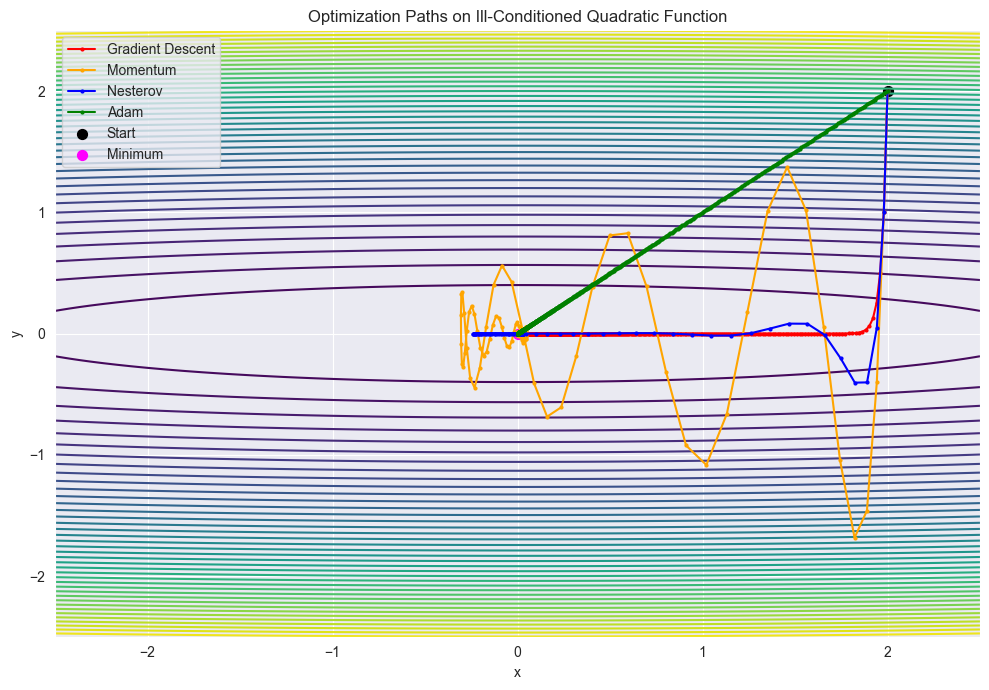

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x):
    return 0.5 * (x[0]**2 + 50 * x[1]**2)

# Gradient
def grad_f(x):
    return np.array([x[0], 50 * x[1]])

# Gradient Descent
def gradient_descent(x0, lr=0.01, max_iter=1000, tol=1e-6):
    x = x0.copy()
    path = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - lr * grad
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path)

# Momentum
def momentum(x0, lr=0.01, gamma=0.9, max_iter=1000, tol=1e-6):
    x = x0.copy()
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        v = gamma * v + lr * grad
        x_new = x - v
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path)

# Nesterov Accelerated Gradient
def nesterov(x0, lr=0.01, gamma=0.9, max_iter=1000, tol=1e-6):
    x = x0.copy()
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(max_iter):
        x_ahead = x - gamma * v
        grad = grad_f(x_ahead)
        v = gamma * v + lr * grad
        x_new = x - v
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path)

# Adam
def adam(x0, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=1000, tol=1e-6):
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    path = [x.copy()]
    for t in range(1, max_iter + 1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path)

# Initial point
x0 = np.array([2.0, 2.0])

# Compute paths
paths = {
    "Gradient Descent": gradient_descent(x0),
    "Momentum": momentum(x0),
    "Nesterov": nesterov(x0),
    "Adam": adam(x0),
}

# Create contour plot
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 50 * Y**2)

# Plot all paths
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

colors = {
    "Gradient Descent": 'red',
    "Momentum": 'orange',
    "Nesterov": 'blue',
    "Adam": 'green'
}

for label, path in paths.items():
    plt.plot(path[:, 0], path[:, 1], marker='o', markersize=2, label=label, color=colors[label])

plt.scatter([x0[0]], [x0[1]], c='black', label='Start', s=50)
plt.scatter([0], [0], c='magenta', label='Minimum', s=50)
plt.title("Optimization Paths on Ill-Conditioned Quadratic Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()